In [1]:
from metric_utils import *
import numpy as np
import matplotlib.pyplot as plt
import torch
import yaml
from transformers import AutoTokenizer, DataCollatorForLanguageModeling
from sklearn.preprocessing import label_binarize
from data_utils import read_cfg

%load_ext autoreload
%autoreload 2

2024-01-08 20:00:59.510496: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-08 20:00:59.552685: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-08 20:00:59.552725: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-08 20:00:59.554197: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-08 20:00:59.562634: I tensorflow/core/platform/cpu_feature_guar

In [4]:
tokenizer = AutoTokenizer.from_pretrained('../data/AptamerBERT_tokenizer')

y_true_list, y_pred_list = load_test_predictions(
    filename='/glade/u/home/mlsample/work/aptamer_transformer/results/mlm/test_predictions.pkl')
y_true_flat = np.concatenate(y_true_list)

y_pred_flat_src = []
y_pred_flat_tgt = []

for y_pred in y_pred_list:
    
    y_pred_flat_src.extend(y_pred[0])
    y_pred_flat_tgt.extend(y_pred[1])

y_preds = np.array(y_pred_flat_src)
target = np.array(y_pred_flat_tgt)
y_true = np.array(y_true_flat)

y_true_tokenized = np.array(tokenizer(list(map(lambda x: ' '.join(x), y_true)), padding=True).input_ids)
y_preds_tokenized = np.array(np.argmax(y_preds,axis=2))

processed_preds, processed_true = process_data(y_preds, target)
masked_logits = extract_masked_logits(y_preds, target)

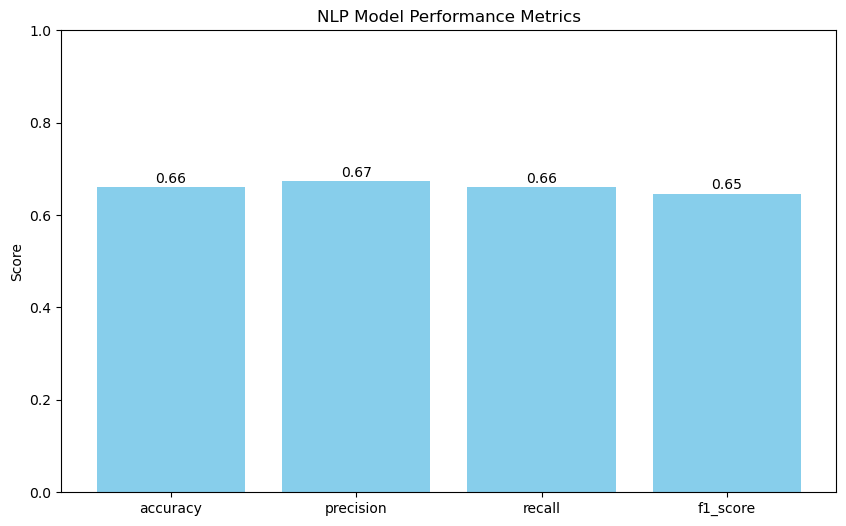

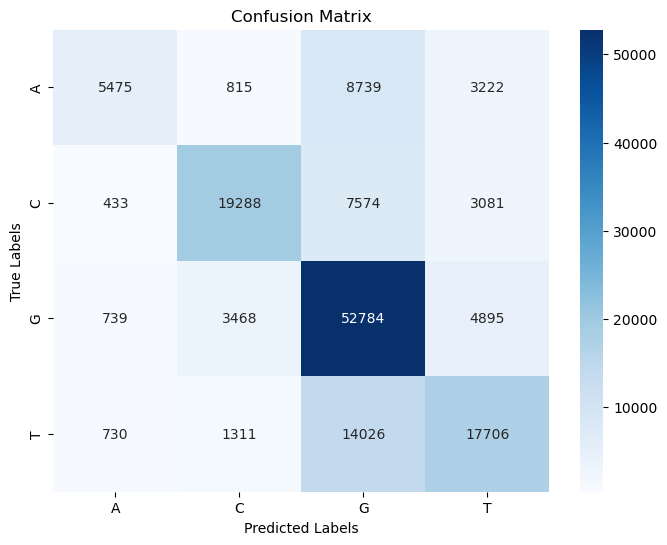

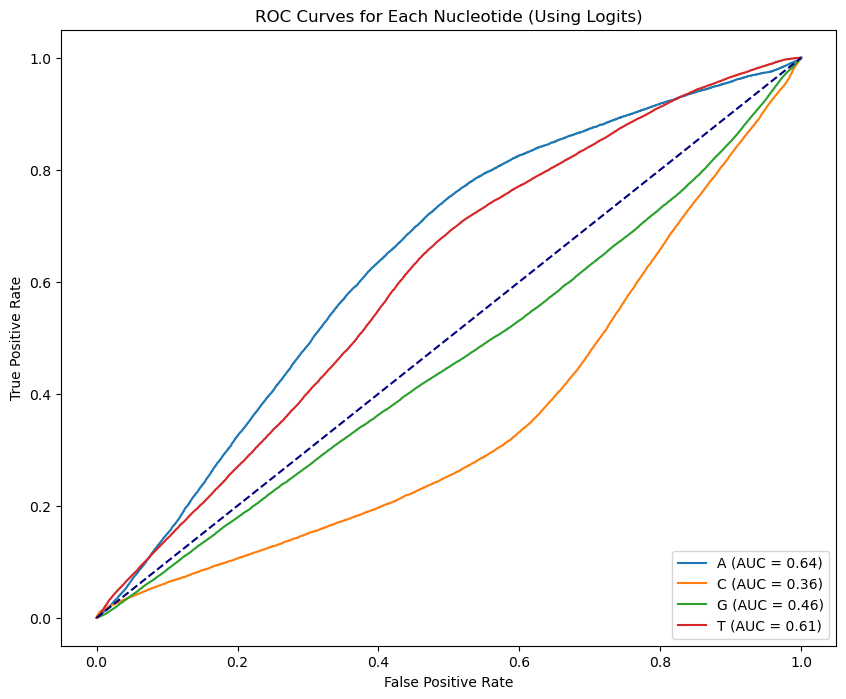


Metrics for nucleotide A:
  Accuracy: 0.3000
  Sensitivity: 0.3000
  Specificity: 0.9849
  MCC: 0.4299

Metrics for nucleotide C:
  Accuracy: 0.6350
  Sensitivity: 0.6350
  Specificity: 0.9509
  MCC: 0.6323

Metrics for nucleotide G:
  Accuracy: 0.8529
  Sensitivity: 0.8529
  Specificity: 0.6318
  MCC: 0.4855

Metrics for nucleotide T:
  Accuracy: 0.5243
  Sensitivity: 0.5243
  Specificity: 0.8987
  MCC: 0.4474


In [5]:
plot_metrics(processed_true, processed_preds)
plot_confusion_matrix(processed_true, processed_preds)
plot_roc_auc_from_logits(masked_logits, processed_true)
per_token_metrics(processed_true, processed_preds)


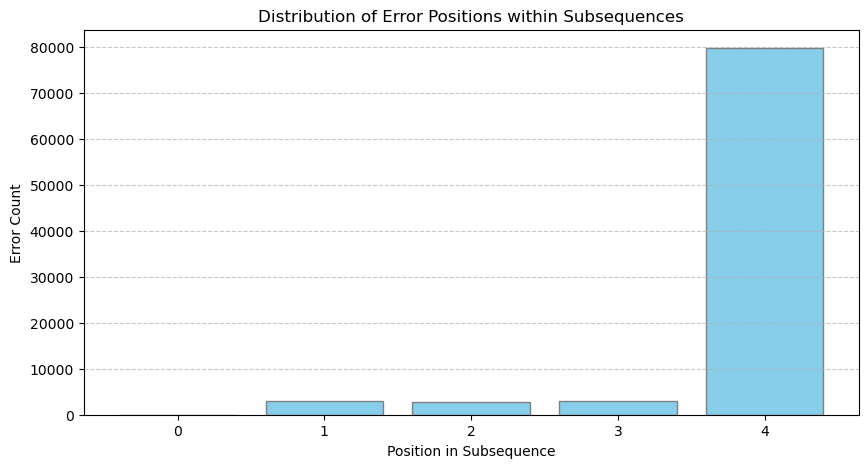

In [191]:
common_error_subsequences_with_pos = find_common_error_subsequences_around_masked(y_true_tokenized, y_preds_tokenized, target, window_size=9)

plot_error_position_distribution(common_error_subsequences_with_pos)

In [ ]:
cfg = 

Accuracy: 0.7188
Precision: 0.6363
Recall: 0.6792
F1-Score: 0.6570


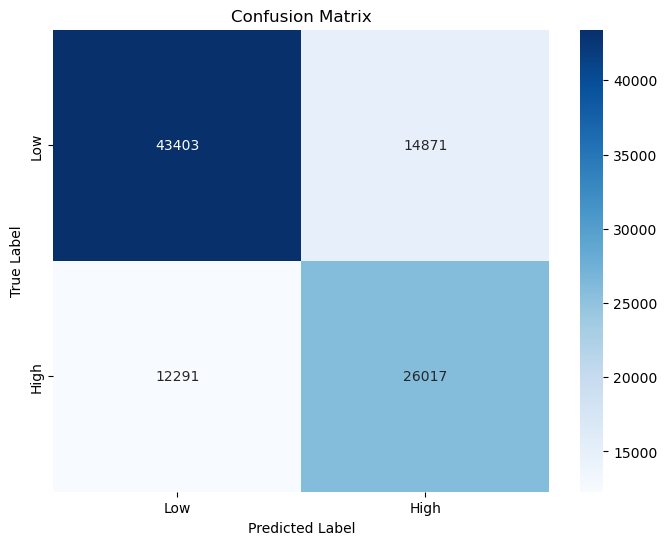

In [8]:
cfg = read_cfg('config.yaml')
y_true_list, y_pred_list =load_test_predictions(filename=f'{cfg["results_path"]}/test_predictions.pkl')


y_true_flat = np.concatenate(y_true_list)

y_pred_flat = np.concatenate([vals.cpu().squeeze() for vals in y_pred_list])

plot_classification_metrics(y_true_flat, y_pred_flat, class_names=['Low', 'High'])
# mse, rmse, mae, r2, mape, explained_variance = evaluate_regression_model(y_true_flat, y_pred_flat)

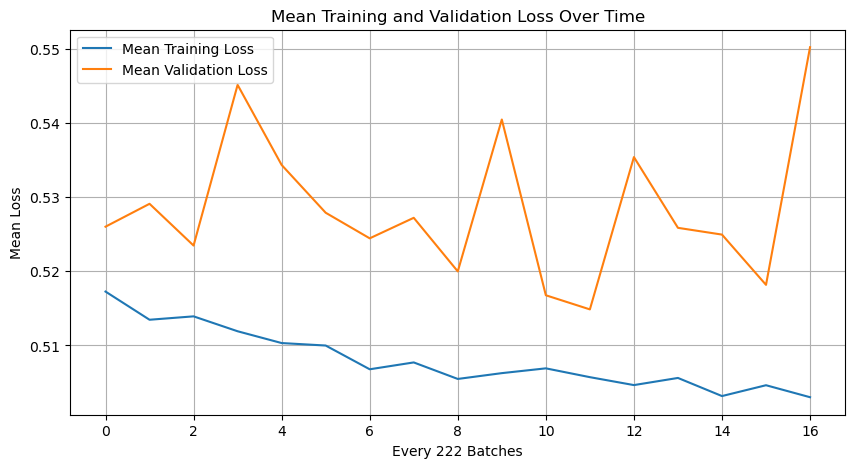

In [11]:
cfg = read_cfg('config.yaml')

plot_mean_loss(f'{cfg["results_path"]}/loss_data.json',222)

In [165]:
y_preds_tokenized.shape, y_true_tokenized.shape

((96582, 42), (96582, 42))

In [ ]:
y_true_spaced = np.array(list(map(lambda x: ' '.join(x), y_true)), dtype=object)
y_preds_decoded = np.array(tokenizer.batch_decode(np.argmax(y_preds,axis=2)), dtype=object)